# Part A

All the implementation logic is hidden in main.py

In [1]:
from main import *
import matplotlib
matplotlib.rcParams["figure.figsize"] = [20,15]
matplotlib.rcParams.update({'font.size': 20})

We first create the required system containing the source, sink and a uniform velocity field

In [2]:
particles = [source(-1,0), source(1,0, strength = -1), uniform(strength=1, alpha=np.pi/4), vortex(0,0,fixed=True)]
s = system(particles)

Plotting the streamlines, potential lines, velocity fields and tracer paths:

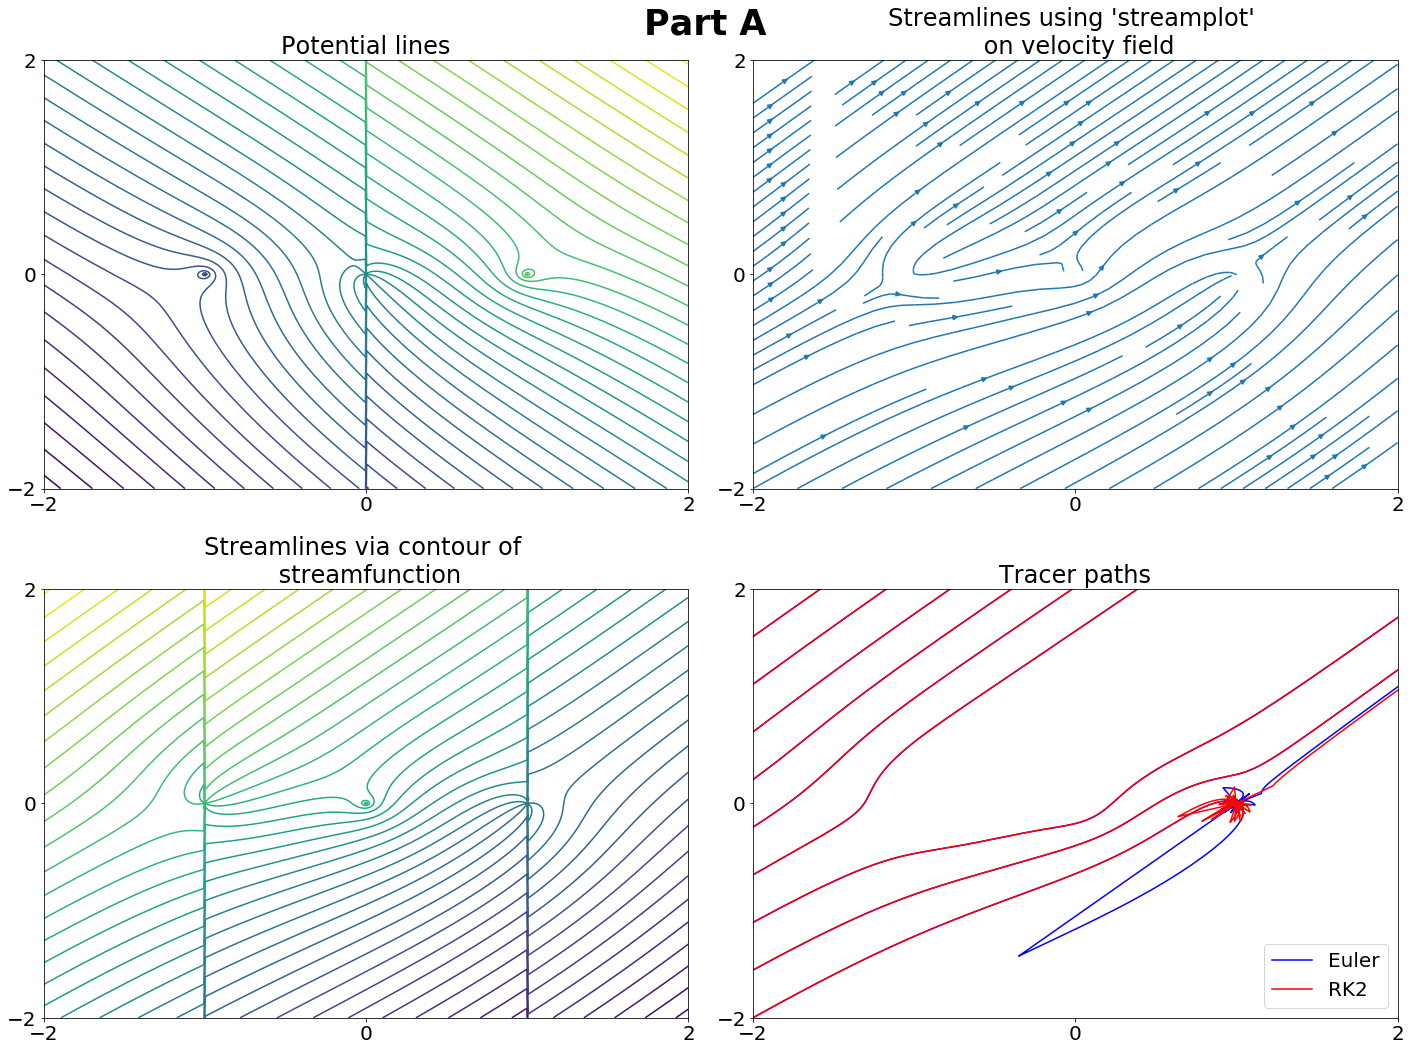

In [3]:
#Initializing the grid
x = y = np.linspace(-2,2,500)
x,y = np.meshgrid(x,y)

#Computing streamfunction, potential function and velocities
phi, psi = s.get_Phi(x, y)
u, v = s.get_vel(x, y)

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle("Part A", fontsize=35, fontweight='bold')
titles = ["Potential lines", "Streamlines using 'streamplot' \n on velocity field", "Streamlines via contour of \n streamfunction", "Tracer paths"]
for ax, title in zip(axes.flatten(), titles):
    ax.set_title(title)
    ax.set(xlim = [-2,2], ylim=[-2,2])
    ax.set_xticks([-2,0,2])
    ax.set_yticks([-2,0,2])

#Plotting streamlines, velocity field and potential lines
axes[0,0].contour(x,y, phi,50)
axes[0,1].streamplot(x, y, u, v)
axes[1,0].contour(x,y, psi,50)

#Initializing tracers
s.add_particles([tracer(-2,yti) for yti in np.linspace(-2,2,10)])

#Setting simulation parameters (timestep 'dt' and time horizon 'Th')
dt = 1e-3
Th = 10

#simulating the system using the euler method
s.simulate(dt,Th, method="euler")

#Plotting the tracer paths and resetting the tracers
for tracr in s.get_moving_particles():
    axes[1,1].plot(tracr.X, tracr.Y, 'b-')
    tracr.x = tracr.X[0]
    tracr.y = tracr.Y[0]
    tracr.X = [tracr.x]
    tracr.Y = [tracr.y]

#Simulating the system using RK2
s.simulate(dt,Th, method="RK2")

#Plotting the tracers
for tracr in s.get_moving_particles():
    axes[1,1].plot(tracr.X, tracr.Y, 'r-')

#Legend and plotting
euler = axes[1,1].plot([],[],'b-', label="Euler"); rk2 = axes[1,1].plot([],[],'r-', label = "RK2");
plt.legend()
plt.tight_layout()
plt.show()

# Part B
## Pair of vortices

Simulating the motion of a pair of vortices:

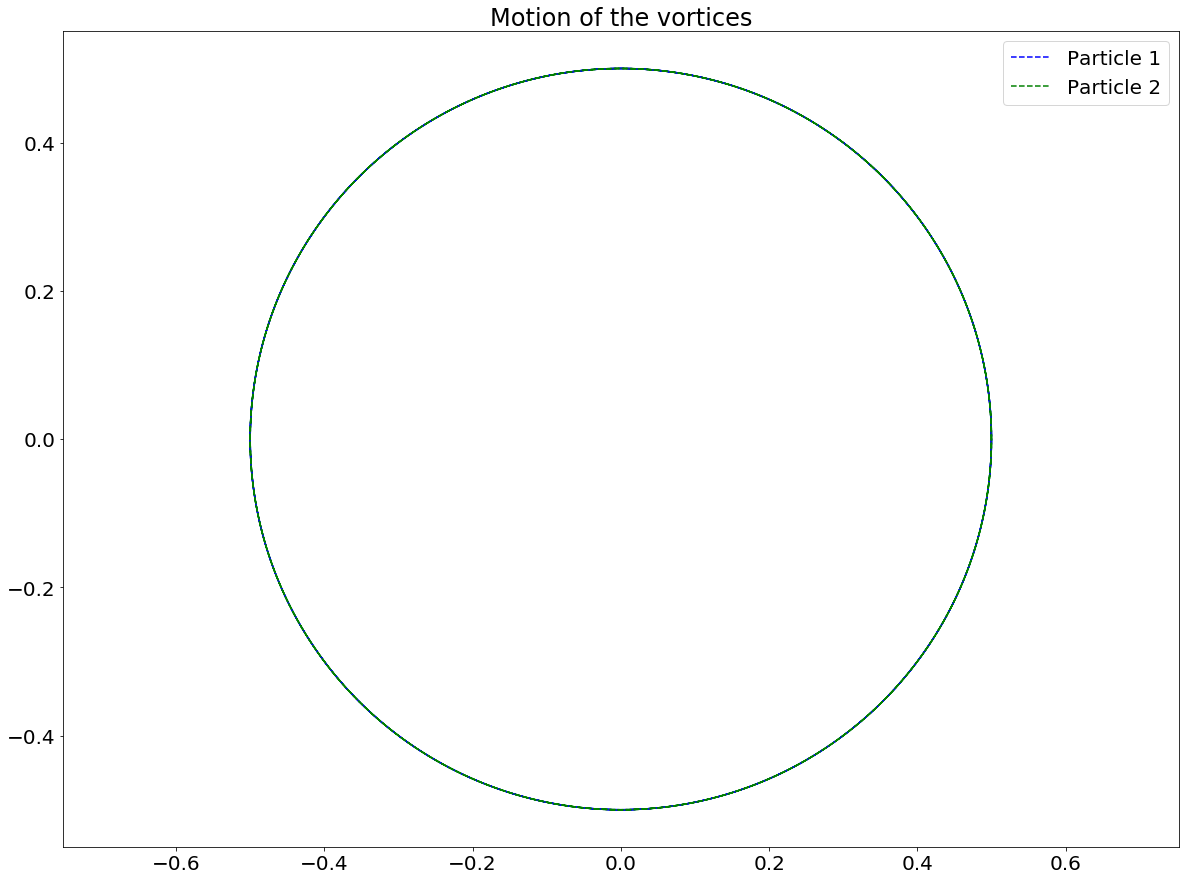

In [4]:
#Initializing the system
particles   = [vortex(-0.5,0), vortex(0.5,0)]
s2          = system(particles)

#Simulating it for 6*pi^2 seconds (Time for 3 revolutions)
s2.simulate(1e-4,6*np.pi**2, method="RK2")

#Plotting the results
fig, axes = plt.subplots()
axes.set_title("Motion of the vortices")
axes.axis("equal")
for tracr, c, l in zip(s2.get_moving_particles(), ['b--', 'g--'], ['Particle 1', "Particle 2"]):
    axes.plot(tracr.X, tracr.Y, c, label = l)
plt.legend()
plt.show()

Computing the variation in error with timestep size for Euler and second order Runge Kutta(midpoint) methods

In [5]:
error = {}
fig, ax = plt.subplots()
for method, color in zip(["euler", "RK2"], ['b','r']):
    error[method] = []
    for dt in np.linspace(1e-4, 1e-3, 10):
        particles   = [vortex(-0.5,0), vortex(0.5,0)]
        s2          = system(particles)
        s2.simulate(dt,6*np.pi**2, method=method)
        error[method].append(0)
        for tracr in s2.get_moving_particles():
            error[method][-1] = error[method][-1] + (tracr.X[-1] - tracr.X[0])**2 + (tracr.Y[-1] - tracr.Y[0])**2
    ax.plot(np.linspace(1e-4, 1e-3, 10), error[method], color, label=method)
    ax.set(ylabel="Error (Squared distance error at final point)", xlabel="Timestep size")
plt.legend()
plt.show()

main.py:75: RuntimeWarning: invalid value encountered in divide
  return self.strength*np.array([-y,x])/(2*np.pi*r_sq)


KeyboardInterrupt: 

## Observing passive tracers

In [ ]:
particles   = [vortex(-0.5,0), vortex(0.5,0)]
s2          = system(particles)
s2.add_particles([tracer(0,i) for i in np.linspace(-1,1,10)])
s2.simulate(dt=1e-3,Th=6*np.pi**2, method="RK2")


fig, axes = plt.subplots(nrows=5, ncols=2, figsize=[20,45])
for tracr, ax in zip(s2.get_tracers(), axes.flatten()):
    ax.plot(s2.particles[0].X, s2.particles[0].Y, 'b')
    ax.plot(tracr.X, tracr.Y, 'r--')
    ax.set_xlim([-1.5,1.5])
    ax.set_ylim([-1.5,1.5])
    ax.set_xticks([-1.5,0,1.5])
    ax.set_yticks([-1.5,0,1.5])

plt.show()

## Vortices in a Triangle

In [ ]:
particles = [vortex(-0.5,0), vortex(0.5, 0), vortex(0, 0.5)]
s2          = system(particles)

s2.add_particles([tracer(i,i) for i in np.linspace(-1,1,10)])
s2.simulate(dt=1e-3,Th=6*np.pi**2, method="RK2")

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=[20,45])
for tracr, ax in zip(s2.get_tracers(), axes.flatten()):
    ax.plot(s2.particles[0].X, s2.particles[0].Y, 'r')
    ax.plot(s2.particles[1].X, s2.particles[1].Y, 'b')
    ax.plot(s2.particles[2].X, s2.particles[2].Y, 'g')
    ax.plot(tracr.X, tracr.Y, 'y--')
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    ax.set_xticks([-2,0,2])
    ax.set_yticks([-2,0,2])


plt.show()